# Assignment 2 - AI/ML - 25UCS217

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Task 1 : Dataset Understanding & Basic Exploration


In [3]:
# loading the dataset
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# identifying variables
# using reading score to predict math score
# x is independent, y is dependent
X = df[['reading score']]
y = df['math score']

# Task 2 : Data Preprocessing

In [14]:
# checking for missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [15]:
# splitting the data into train and test
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Task 3 : Implement Linear Regression Model

In [16]:
# importing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# printing slope and intercept
print("coefficient (slope):", model.coef_[0])
print("intercept:", model.intercept_)

coefficient (slope): 0.8465291474700295
intercept: 7.615915147722099


In [18]:
print("what coefficient means: for every 1 point increase in reading score, math score goes up by roughly", round(model.coef_[0], 2))

what coefficient means: for every 1 point increase in reading score, math score goes up by roughly 0.85


# Task 4 : Prediction & Visualization

In [19]:
# predicting scores for test data
y_pred = model.predict(X_test)

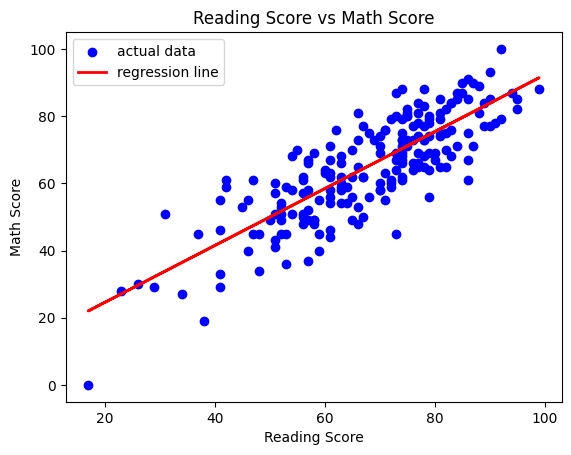

In [20]:
# plotting the scatter plot and line
plt.scatter(X_test, y_test, color='blue', label='actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='regression line')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.title('Reading Score vs Math Score')
plt.legend()
plt.show()

# Task 5: Model Evaluation

In [21]:
# calculating mae and r2 score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Absolute Error: 7.280881770618455
R2 Score: 0.6804469009921283


In [23]:
# explanation of model performance
print("model performance: the r2 score is around", round(r2, 2))
print("this means the model is doing a good job predicting math scores from reading scores")

model performance: the r2 score is around 0.68
this means the model is doing a good job predicting math scores from reading scores
